# Práctica n°1 : Diagramas de caracterización usando R

Notas del Curso Gestión de la calidad y control estadístico de procesos

** Ibeth Vergara Baquero**   
ivergara@uco.edu.co   
Universidad Católica de Oriente   
Facultad de ingenierías    
Rionegro, Colombia


> ** Objetivo de la práctica:** Desarrollar Scripts para la elaboración de diagramas causa-efecto, diagramas Pareto, diagramas dispersión e histogramas en R.

>**Contenido**
* [Diagrama Causa-Efecto](#Diagrama-Causa-Efecto)
* [Diagrama Pareto](#Diagrama-Pareto)
* [Diagramas de correlación](#Diagramas-de-correlación)
* [Histograma](#Histograma)

**Bibliografía**.
> [Package ‘qcc’](https://cran.r-project.org/web/packages/qcc/qcc.pdf)  
> [Package ‘SixSigma’](https://cran.r-project.org/web/packages/SixSigma/SixSigma.pdf)   
> [Package ‘psych’](https://cran.r-project.org/web/packages/psych/psych.pdf)

A continuación se presentará el taller propuesto para complementar los temas vistos en clase con la programación en R.

### Diagrama Causa-Efecto
**1.** Luego de una lluvia de ideas para la identificación de posibles causas asociadas a los defectos superficiales que se encuentran comúnmente en los productos de determinada compañía, se logró organizar dicha información de la siguiente manera  

* *Mediciones*:  
  * Micrómetros 
  * Microscopios
  * Inspector
* *Materiales*:
  * Aleaciones
  * Lubricante
  * Suplementos
* *Personal*:
  * Turnos
  * Supervisores
  * Formadores
  * Operadores
* *Medioambiente*:
  * Condensación
  * Humedad
* *Maquinas*:
  * Velocidad
  * Tornos
  * Enchufes
  * Rutina
* *Métodos*:
  * Freno
  * Enganchado
  * Angulo  
  
Realice el diagrama causa- efecto

***Para realizar el diagrama Causa- Efecto podemos hacer uso de dos dos librerias disponibles en R, una es "qcc" y la otra "SixSigma".*** 

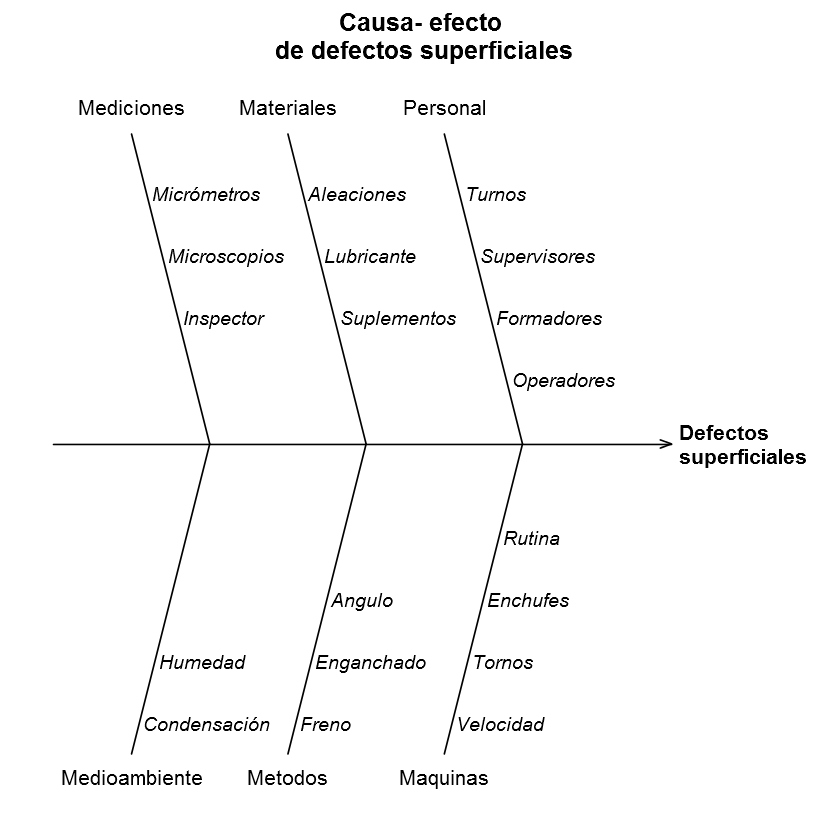

In [41]:
require(qcc)

cause.and.effect(cause = list(Mediciones = c("Micrómetros", "Microscopios", "Inspector"), # se comienzan a listar las causas
                              Materiales = c("Aleaciones", "Lubricante", "Suplementos"),
                              Personal = c("Turnos", "Supervisores", "Formadores", "Operadores"),
                              Medioambiente = c("Condensación", "Humedad"), 
                              Metodos = c("Freno", "Enganchado", "Angulo"),
                              Maquinas = c("Velocidad", "Tornos", "Enchufes", "Rutina")),
                 effect="Defectos \nsuperficiales",  # Efecto
                 title = "Causa- efecto\n de defectos superficiales")

## la cantidad de categoria de causas deberá ser siempre un número par para que la función pueda ejecutarse correctamente.
## Las categorias de causas no deben tener espacios en sus nombre

**2.** El mismo estudio realizado en la empresa anterior se llevó acabo en otra organización para determinar las causas asociadas al efecto del tiempo de vuelo para el proyecto de helicópteros de papel y la información que se encontró se presenta a continuación:
* *Operador*:
  * Operador #1
  * Operador #2
  * Operador #3
* *Medioambiente*:
  * Altura
  * Limpieza
* *Herramientas*:
  * Tijeras
  * Cinta adhesiva
* *Diseño*:
  * Longitud del rotor
  * Ancho del rodillo
  * Sujetador de papeles
* *Materia prima*:
  * Espesor
  * Marca
* *Herramienta de medición*:
   * Calibre
   * Modelo
 



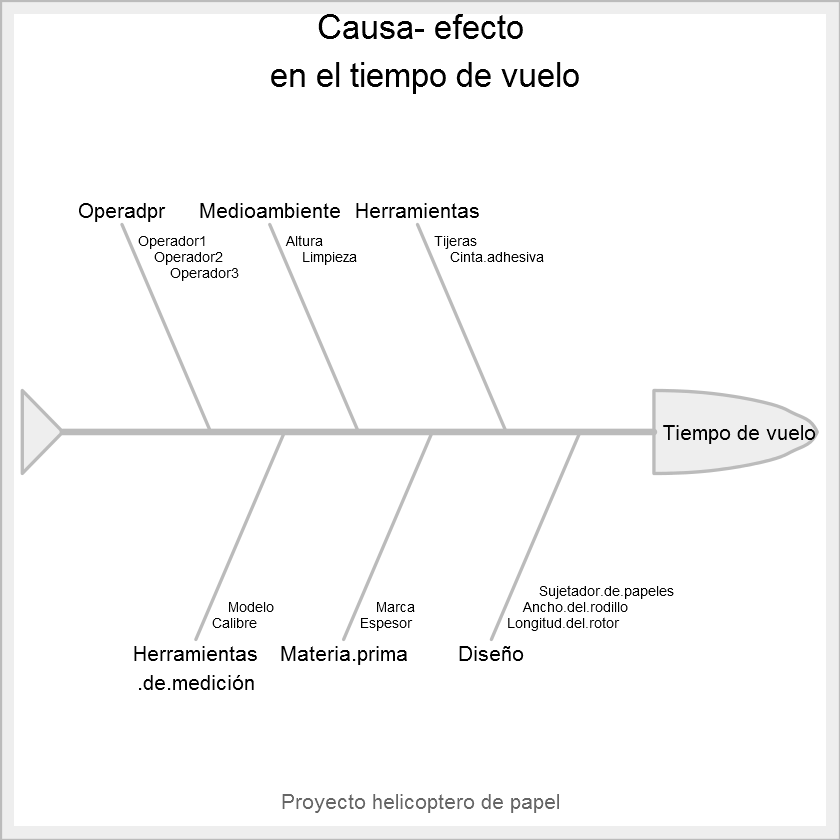

In [42]:
## También se puede realizar el diagrama con la libreria SixSigma
require(SixSigma)
effect    <- "Tiempo de vuelo"
## Categorias de causas
causes.gr <- c("Operadpr", "Medioambiente", "Herramientas", "Diseño","Materia.prima", "Herramientas\n.de.medición")
##

# Causas para cada una de esas categorias
causes    <- vector(mode = "list", length = length(causes.gr)) # creamos un vector del tamaño de las categorias de causas
causes[1] <- list(c("Operador1", "Operador2", "Operador3")) # Causas asociadas a la primera categoria
causes[2] <- list(c("Altura", "Limpieza"))
causes[3] <- list(c("Tijeras", "Cinta.adhesiva"))
causes[4] <- list(c("Longitud.del.rotor", "Ancho.del.rodillo","Sujetador.de.papeles"))
causes[5] <- list(c("Espesor","Marca"))
causes[6] <- list(c("Calibre", "Modelo"))

# se indica las caracteristicas del diagrama y se realiza
ss.ceDiag(effect, causes.gr, causes, sub = "Proyecto helicoptero de papel", main="Causa- efecto\n en el tiempo de vuelo") 

**3. Ejercicio** Realice el diagrama de causa efecto de la clase 3

### Diagrama Pareto

**4.**  Elaborar el Pareto de los datos contenidos en los archivos datos1 y datos2


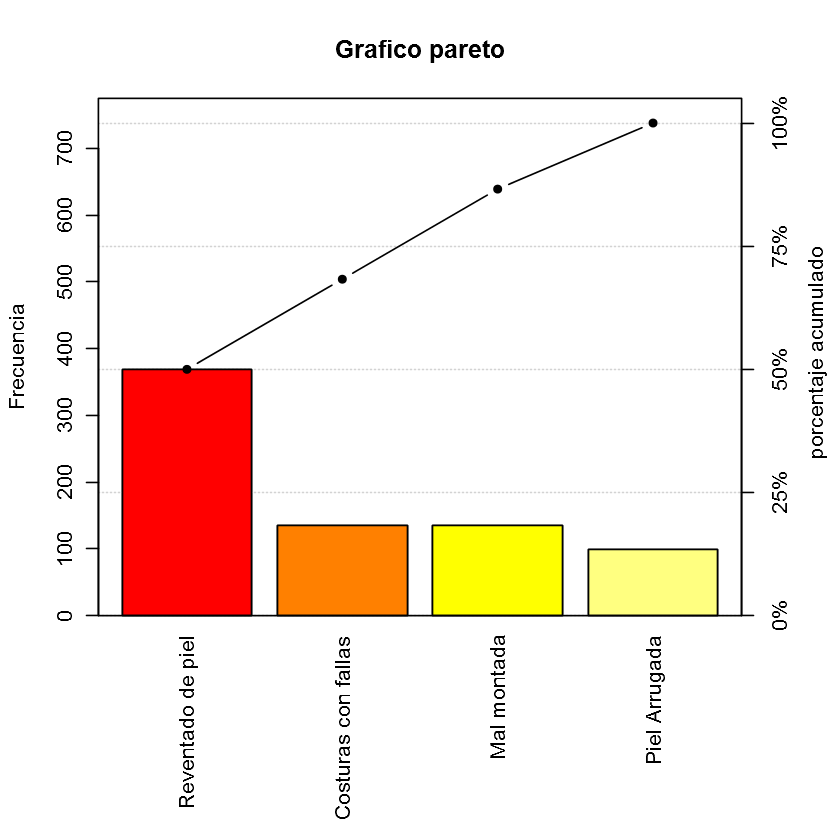

In [29]:
## Recuerde siempre explorar sus datos para saber como estan estructurados
s=read.csv("datos1.csv",header=T) # los datos contiene las etiquetas de los defectos en la columna Defecto
Tipo <- s$Cantidad
names(Tipo) <- s$Defecto 
tabla <- pareto.chart(Tipo, ylab = "Frecuencia", ylab2 = "porcentaje acumulado", main="Grafico pareto")


Como se puede notar la mayor cantidad de defectos que se encuentran estan asociados a el "Reventado de piel" , este análisis se puede acompañar de un estudio de costo o ponderación de estos defectos. 

,Frequency,Cum.Freq.,Percentage,Cum.Percent.
1,16,16,40,40
2,14,30,35,75
3,10,40,25,100


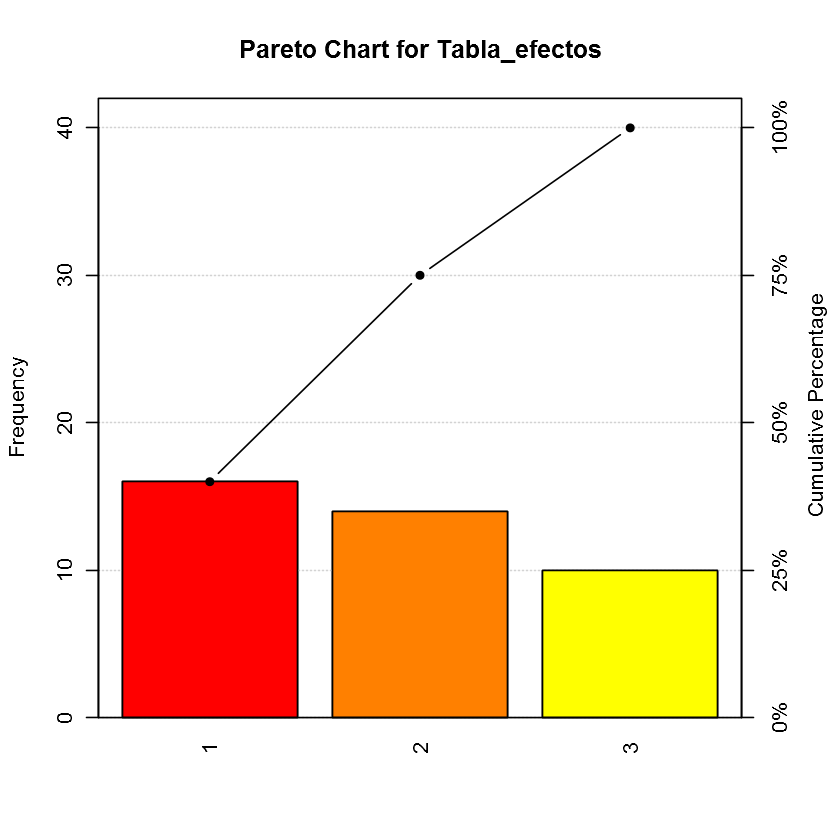

In [44]:
r=read.csv("datos2.csv",header=T)
Tabla_efectos <- table(r) # en este caso los datos se fueron listando conforme se presentaban, se elabora una tabla
pareto.chart(Tabla_efectos) # realizar el pareto

### Diagramas de correlación

**5.**  Analizar la correlación entre la variable Ozono y temperatura de la base de datos airquality. ¿Cómo es la correlación entre Ozono, temperatura y la radiación solar? Concluir sobre cada uno de los gráficos.

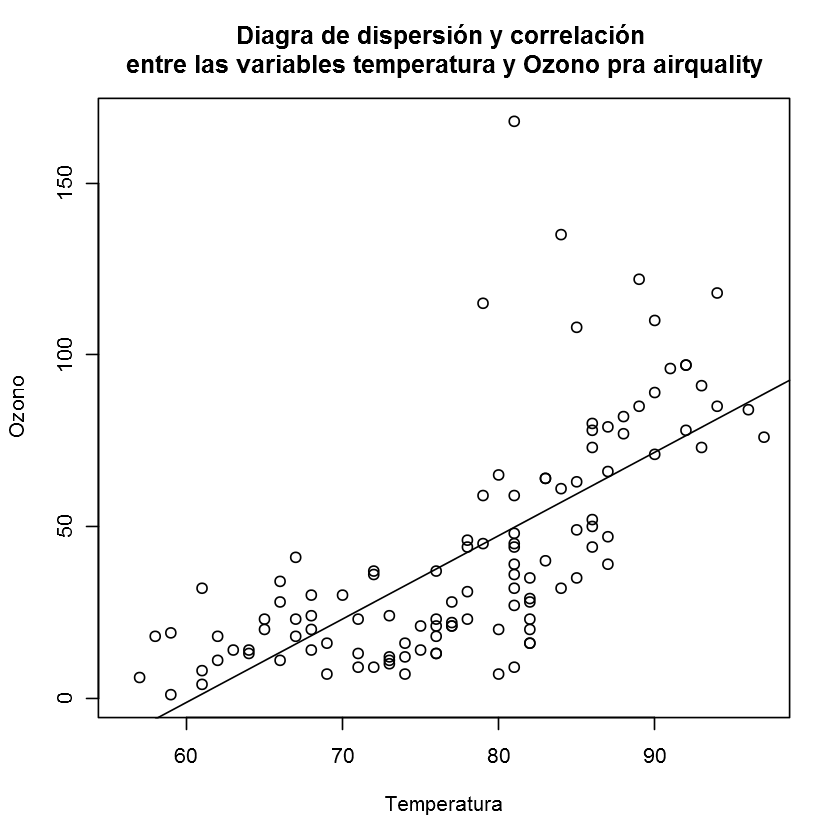

In [47]:
# airquality es una base de datos almacenada en R
plot(airquality$Ozone~airquality$Temp,
     main="Diagra de dispersión y correlación \nentre las variables temperatura y Ozono pra airquality", 
     xlab="Temperatura" , ylab="Ozono") 
abline(lm(airquality$Ozone~airquality$Temp)) # para mostrar la línea de tendencia, lm indica regresión líneal

Se observa que existe un grado de correlación positiva.

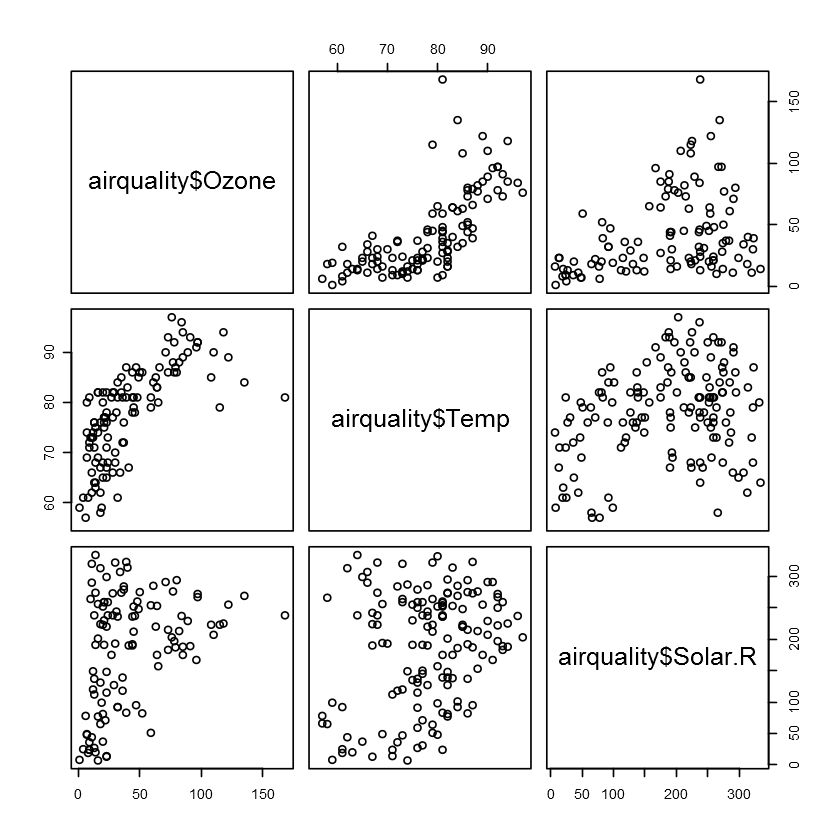

In [54]:
###Crear varios diagramas
pairs(~airquality$Ozone+airquality$Temp+airquality$Solar.R)

Cada intersección corresponde a la correlación entre dos variables, por ejemplo, el recuadro ubicado al lado de Ozone corresponde a la correlación de esta variable y la temperatura, se nota que existe una correlación fuerte positiva entre estas dos variables

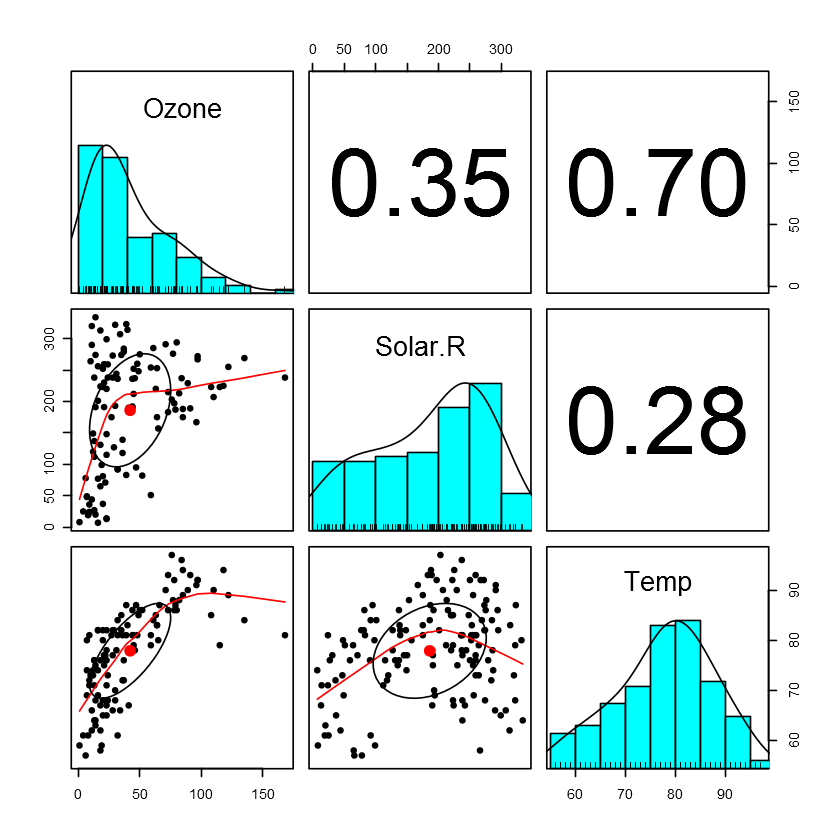

In [57]:
### analisis de correlación
require(psych)
pairs.panels(airquality[c(1,2,4)])

Este análisis nos permite obtener los grados de correlación entre dos variables, por ejemplo, para el caso de Ozone y Temperatura la correlación entre ellas es de 0.70. Recordemos que cuando se tiene una correlación perfecta, su coeficiente de correlación siría 1

### Histograma

**6.** Elaborar un histograma para la variable temperatura de la base de datos airquality.

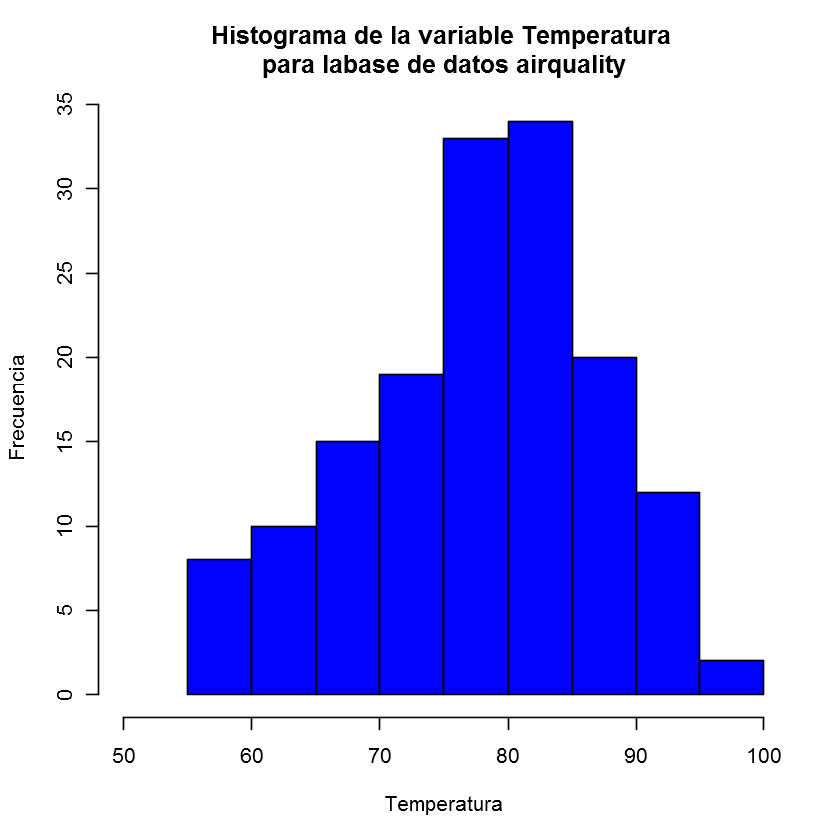

In [40]:
hist(airquality$Temp, # variable a la cual le realizare el histograma
     main="Histograma de la variable Temperatura \npara labase de datos airquality", # título del diagrama
     col=4, # color del grafico en este caso será azul
     breaks=13, # numero de barras en el histograma, R no generara las barras que no permitan una buena elaboración del grafico
     xlim=c(50,100),
     xlab = "Temperatura",
     ylab = "Frecuencia") # Limites del eje x